# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip install numpy==1.13.3
!pip install widgetsnbextension==3.0.0
!pip install jsonschema==3.0.1
!pip install jupyter-client==7.0.0
!pip install prompt-toolkit==2.0.1

    100% |████████████████████████████████| 17.0MB 1.1MB/s eta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
    100% |████████████████████████████████| 2.5MB 7.3MB/s eta 0:00:01
  Found existing installation: widgetsnbextension 3.1.0
    Uninstalling widgetsnbextension-3.1.0:
      Successfully uninstalled widgetsnbextension-3.1.0
    100% |████████████████████████████████| 61kB 4.0MB/s ta 0:00:011
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
    100% |████████████████████████████████| 122kB 4.4MB/s ta 0:00:01


    100% |████████████████████████████████| 92kB 19.7MB/s ta 0:00:01
  Found existing installation: jupyter-core 4.4.0
    Uninstalling jupyter-core-4.4.0:
      Successfully uninstalled jupyter-core-4.4.0
  Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4
    100% |████████████████████████████████| 327kB 10.0MB/s ta 0:00:01
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.15
    Uninstalling prompt-toolkit-1.0.15:
      Successfully uninstalled prompt-toolkit-1.0.15


In [2]:
!pip -q install ./python

In [3]:
!ls Tennis_Linux_NoVis/Tennis.x86_64

Tennis_Linux_NoVis/Tennis.x86_64


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [4]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [7]:
from workspace_utils import active_session
with active_session():
    for i in range(5):                                         # play game for 5 episodes
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
from ddpg_agent import Agent
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


agent = Agent(state_size, action_size, 2, num_agents)

###### Workspace Checkpoints

In [8]:
import pickle

scores_deque = deque(maxlen=100)
scores_total = []

return_episode = 1

In [10]:
with open('return_episode.pkl', 'rb') as f: # load return_episode
    return_episode = pickle.load(f) 
    
with open('scores_deque.pkl', 'rb') as f: # load scores_deque
    scores_deque = pickle.load(f) 
    
with open('scores_total.pkl', 'rb') as f: # load scores_total
    scores_total = pickle.load(f) 

''' Load Actor-Critic Networks '''
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

###### Multiple DDPG Agents

Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.01
Episode 300	Average Score: 0.02
Episode 400	Average Score: 0.06
Episode 500	Average Score: 0.17
Episode 600	Average Score: 0.39
Episode 662	Average Score: 0.50
Environment solved in 562 episodes!	Average Score: 0.50


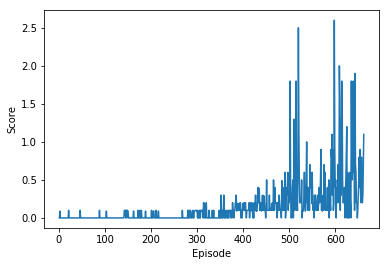

In [9]:
def ddpg(scores_deque, scores_total, return_episode, n_episodes=3000, max_t=1368, range_avg=100, checkpoint=100):
    for i_episode in range(return_episode, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
            states = env_info.vector_observations                  # get the current state (for each agent)
            scores = np.zeros(num_agents)                          # initialize the score (for each agent)
            agent.reset()
            for t in range(max_t):
                actions = agent.act(states)
                env_info = env.step(actions)[brain_name]           # send all actions to tne environment
                next_states = env_info.vector_observations         # get next state (for each agent)
                rewards = env_info.rewards                         # get reward (for each agent)
                dones = env_info.local_done                        # see if episode finished
                for s, a, r, ns, d in zip(states, actions, rewards, next_states, dones):
                    agent.step(t, s, a, r, ns, d)
                scores += rewards                                  # update the score (for each agent)
                states = next_states                               # roll over states to next time step
                if np.any(dones):                                  # exit loop if episode finished
                    break 
            scores_max = np.max(scores)
            scores_deque.append(scores_max)
            scores_total.append(scores_max)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")

            if i_episode % checkpoint == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

                with open('scores_deque.pkl', 'wb') as f:  # save scores_deque
                    pickle.dump(scores_deque, f)  

                with open('scores_total.pkl', 'wb') as f:  # save scores_total
                    pickle.dump(scores_total, f) 

                with open('return_episode.pkl', 'wb') as f: # save return_episode
                    pickle.dump(i_episode, f) 

                '''Save Actor-Critic Networks'''
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

            if len(scores_deque)>=100 and np.mean(scores_deque)>=.5:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-range_avg, np.mean(scores_deque)))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                break    
        
    return scores_total

scores_total = ddpg(scores_deque, scores_total, return_episode)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_total)+1), scores_total)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

When finished, you can close the environment.

In [10]:
env.close()